# Points

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import pysal as ps
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point

## Data

* Description of the data and paths

In [2]:
lsoas_path = '../../../../data/Liverpool/shapefiles/Liverpool_lsoa11.shp'
tw_path = '../../../../data/tweets/tweets_liverpool/tweets_liverpool.shp'

* Load up the data

In [3]:
tw = gpd.read_file(tw_path)
tw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 131209 entries, 0 to 131208
Data columns (total 12 columns):
DAY         131209 non-null int64
DOW         131209 non-null int64
HOUR        131209 non-null int64
LAT         131209 non-null float64
LON         131209 non-null float64
LSOA11CD    131209 non-null object
MINUTE      131209 non-null int64
MONTH       131209 non-null int64
X           131209 non-null float64
Y           131209 non-null float64
YEAR        131209 non-null int64
geometry    131209 non-null object
dtypes: float64(4), int64(6), object(2)
memory usage: 13.0+ MB


* Random sample

In [4]:
ri = np.arange(tw.shape[0])
np.random.shuffle(ri)
tw = tw.iloc[ri[:10000], :]
tw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10000 entries, 32927 to 54940
Data columns (total 12 columns):
DAY         10000 non-null int64
DOW         10000 non-null int64
HOUR        10000 non-null int64
LAT         10000 non-null float64
LON         10000 non-null float64
LSOA11CD    10000 non-null object
MINUTE      10000 non-null int64
MONTH       10000 non-null int64
X           10000 non-null float64
Y           10000 non-null float64
YEAR        10000 non-null int64
geometry    10000 non-null object
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.6+ KB


## Aggregation to polygons

* Read LSOA polygons.

In [29]:
lsoas = gpd.read_file(lsoas_path).set_index('LSOA11CD')

* Agregate tweets to polygons

In [31]:
tw_lsoa = tw.groupby('LSOA11CD').size()
lsoas['tweet_count'] = tw_lsoa

* Plot equal interval choropleth

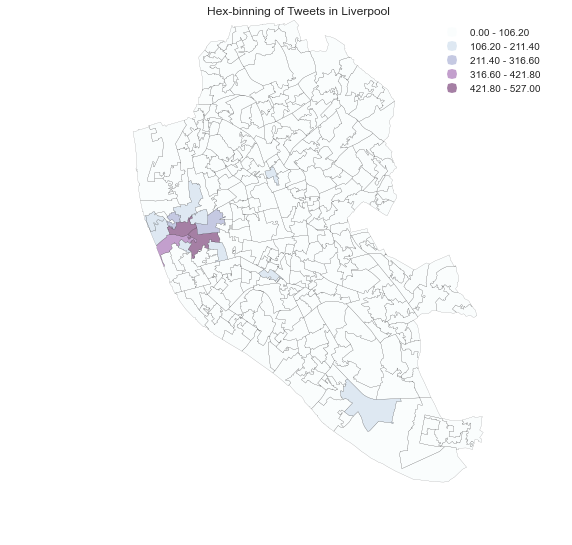

In [37]:
f, ax = plt.subplots(1, figsize=(9, 9))
lsoas.plot(column='tweet_count', scheme='equal_interval', legend=True, \
           axes=ax, colormap='BuPu', linewidth=0.1)
ax.set_axis_off()
ax.set_title("Hex-binning of Tweets in Liverpool")
plt.axis('equal')
plt.show()

* Optional exercise: quantiles choropleth

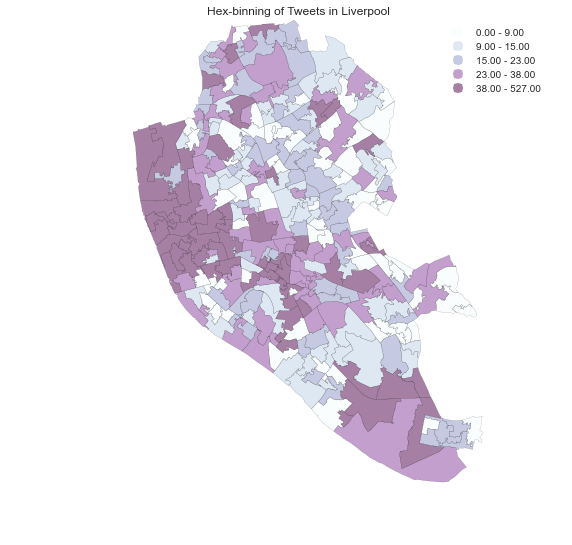

In [38]:
f, ax = plt.subplots(1, figsize=(9, 9))
lsoas.plot(column='tweet_count', scheme='quantiles', legend=True, \
           axes=ax, colormap='BuPu', linewidth=0.1)
ax.set_axis_off()
ax.set_title("Hex-binning of Tweets in Liverpool")
plt.axis('equal')
plt.show()

* Hexbin

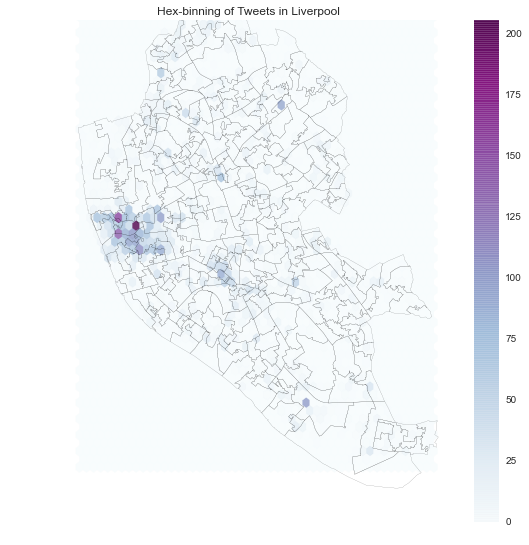

In [18]:
f, ax = plt.subplots(1, figsize=(9, 9))
for poly in lsoas['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='white', alpha=0, linewidth=0.1)
hb = ax.hexbin(tw.X, tw.Y, gridsize=50, alpha=0.8, cmap='BuPu')
plt.colorbar(hb)
ax.set_axis_off()
ax.set_title("Hex-binning of Tweets in Liverpool")
plt.axis('equal')
plt.show()

## Kernel Density Estimation

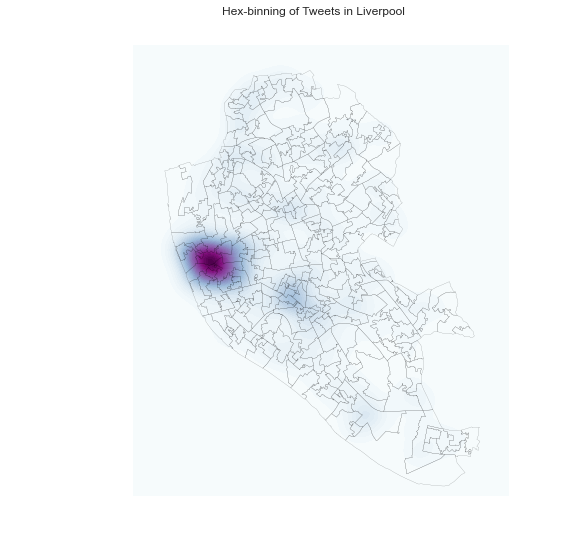

In [26]:
f, ax = plt.subplots(1, figsize=(9, 9))
for poly in lsoas['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='white', alpha=0, linewidth=0.1)
sns.kdeplot(tw['X'], tw['Y'], ax=ax, \
            n_levels=50, shade=True, cmap='BuPu')
ax.set_axis_off()
ax.set_title("Hex-binning of Tweets in Liverpool")
plt.axis('equal')
plt.show()